In [11]:
import pandas as pd

In [12]:
steam_data = pd.read_csv("steam.csv")

In [13]:
steam_data.head(), steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

(   appid                       name release_date  english         developer  \
 0     10             Counter-Strike   2000-11-01        1             Valve   
 1     20      Team Fortress Classic   1999-04-01        1             Valve   
 2     30              Day of Defeat   2003-05-01        1             Valve   
 3     40         Deathmatch Classic   2001-06-01        1             Valve   
 4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   
 
   publisher          platforms  required_age  \
 0     Valve  windows;mac;linux             0   
 1     Valve  windows;mac;linux             0   
 2     Valve  windows;mac;linux             0   
 3     Valve  windows;mac;linux             0   
 4     Valve  windows;mac;linux             0   
 
                                           categories  genres  \
 0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
 1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
 2              Multi-playe

In [14]:
# Función para calcular el promedio del rango de propietarios
def extract_average_owners(owners):
    try:
        lower, upper = map(int, owners.replace(",", "").split("-"))
        return (lower + upper) // 2
    except ValueError:
        return None

# Aplicar la función a la columna 'owners'
steam_data['average_owners'] = steam_data['owners'].apply(extract_average_owners)

# Revisar valores nulos y estadísticas descriptivas de las columnas seleccionadas
summary = steam_data[['average_owners', 'price', 'average_playtime']].describe(), steam_data.isnull().sum()
summary


(       average_owners         price  average_playtime
 count    2.707500e+04  27075.000000      27075.000000
 mean     1.340905e+05      6.078193        149.804949
 std      1.328089e+06      7.874922       1827.038141
 min      1.000000e+04      0.000000          0.000000
 25%      1.000000e+04      1.690000          0.000000
 50%      1.000000e+04      3.990000          0.000000
 75%      3.500000e+04      7.190000          0.000000
 max      1.500000e+08    421.990000     190625.000000,
 appid                0
 name                 0
 release_date         0
 english              0
 developer            1
 publisher           14
 platforms            0
 required_age         0
 categories           0
 genres               0
 steamspy_tags        0
 achievements         0
 positive_ratings     0
 negative_ratings     0
 average_playtime     0
 median_playtime      0
 owners               0
 price                0
 average_owners       0
 dtype: int64)

In [15]:
# Calcular ingresos totales estimados por juego
steam_data['total_revenue'] = steam_data['average_owners'] * steam_data['price']

# Ajustar el CLV utilizando el tiempo promedio de juego como un proxy de duración (escalado)
steam_data['clv'] = steam_data['total_revenue'] * (steam_data['average_playtime'] / steam_data['average_playtime'].max())

# Revisar los resultados principales
clv_summary = steam_data[['name', 'average_owners', 'price', 'average_playtime', 'total_revenue', 'clv']].sort_values(by='clv', ascending=False).head(10)
clv_summary


,name,average_owners,price,average_playtime,total_revenue,clv
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000,26.99,22938,2.024250e+09,2.435790e+08
4712,ARK: Survival Evolved,7500000,44.99,14154,3.374250e+08,2.505397e+07
2478,Grand Theft Auto V,15000000,24.99,9837,3.748500e+08,1.934373e+07
12965,MONSTER HUNTER: WORLD,7500000,49.99,6512,3.749250e+08,1.280793e+07
1127,Arma 3,3500000,29.99,18823,1.049650e+08,1.036462e+07
2016,Rust,7500000,27.79,9352,2.084250e+08,1.022526e+07
0,Counter-Strike,15000000,7.19,17612,1.078500e+08,9.964350e+06
121,Garry's Mod,15000000,6.99,12422,1.048500e+08,6.832507e+06
14329,Football Manager 2018,1500000,37.99,19379,5.698500e+07,5.793114e+06
1025,The Elder Scrolls V: Skyrim,15000000,9.99,7089,1.498500e+08,5.572651e+06


In [16]:
# Quitar el formato de texto (símbolo £ y comas) y convertir a números
steam_data['clv'] = steam_data['clv'].replace({'£': '', ',': ''}, regex=True).astype(float)

# Redondear los valores de CLV para que solo tengan 7 dígitos
steam_data['clv'] = steam_data['clv'].apply(lambda x: round(x, -int(len(str(int(x))) - 7)))

# Revisar nuevamente los resultados principales con el CLV ajustado
clv_summary = steam_data[['name', 'average_owners', 'price', 'average_playtime', 'total_revenue', 'clv']].sort_values(by='clv', ascending=False).head(10)
print(clv_summary)


                                name  average_owners  price  average_playtime  \
12836  PLAYERUNKNOWN'S BATTLEGROUNDS        75000000  26.99             22938   
4712           ARK: Survival Evolved         7500000  44.99             14154   
2478              Grand Theft Auto V        15000000  24.99              9837   
12965          MONSTER HUNTER: WORLD         7500000  49.99              6512   
1127                          Arma 3         3500000  29.99             18823   
2016                            Rust         7500000  27.79              9352   
0                     Counter-Strike        15000000   7.19             17612   
121                      Garry's Mod        15000000   6.99             12422   
14329          Football Manager 2018         1500000  37.99             19379   
1025     The Elder Scrolls V: Skyrim        15000000   9.99              7089   

       total_revenue          clv  
12836   2.024250e+09  243579000.0  
4712    3.374250e+08   25053970.0  


In [17]:
clv_summary

,name,average_owners,price,average_playtime,total_revenue,clv
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000,26.99,22938,2.024250e+09,243579000.0
4712,ARK: Survival Evolved,7500000,44.99,14154,3.374250e+08,25053970.0
2478,Grand Theft Auto V,15000000,24.99,9837,3.748500e+08,19343730.0
12965,MONSTER HUNTER: WORLD,7500000,49.99,6512,3.749250e+08,12807930.0
1127,Arma 3,3500000,29.99,18823,1.049650e+08,10364620.0
2016,Rust,7500000,27.79,9352,2.084250e+08,10225260.0
0,Counter-Strike,15000000,7.19,17612,1.078500e+08,9964350.0
121,Garry's Mod,15000000,6.99,12422,1.048500e+08,6832507.0
14329,Football Manager 2018,1500000,37.99,19379,5.698500e+07,5793114.0
1025,The Elder Scrolls V: Skyrim,15000000,9.99,7089,1.498500e+08,5572651.0


acá podemos ver los 10 juegos con mayor CLV. esto en relación 

In [21]:

# Expandir la columna 'genres' para que cada fila tenga un único género
genres_data = steam_data.assign(genres=steam_data['genres'].str.split(';')).explode('genres')

# Calcular el CLV promedio y el número de juegos por género
clv_by_genre = genres_data.groupby('genres').agg(
    clv_mean=('clv', 'mean'),
    game_count=('clv', 'count')
).sort_values(by='clv_mean', ascending=False)

# Mostrar los géneros con mayor CLV promedio
print("CLV promedio por género (Top 10):")
print(clv_by_genre.head(10))


CLV promedio por género (Top 10):
                            clv_mean  game_count
genres                                          
Massively Multiplayer  403683.687020         723
Action                  36981.642042       11903
Adventure               34687.113781       10032
RPG                     22106.777353        4311
Simulation              13797.608359        5194
Strategy                12269.629344        5247
Sports                  10788.346717        1322
Racing                   6326.294087        1024
Nudity                   5566.600939         266
Web Publishing           4873.702893          28


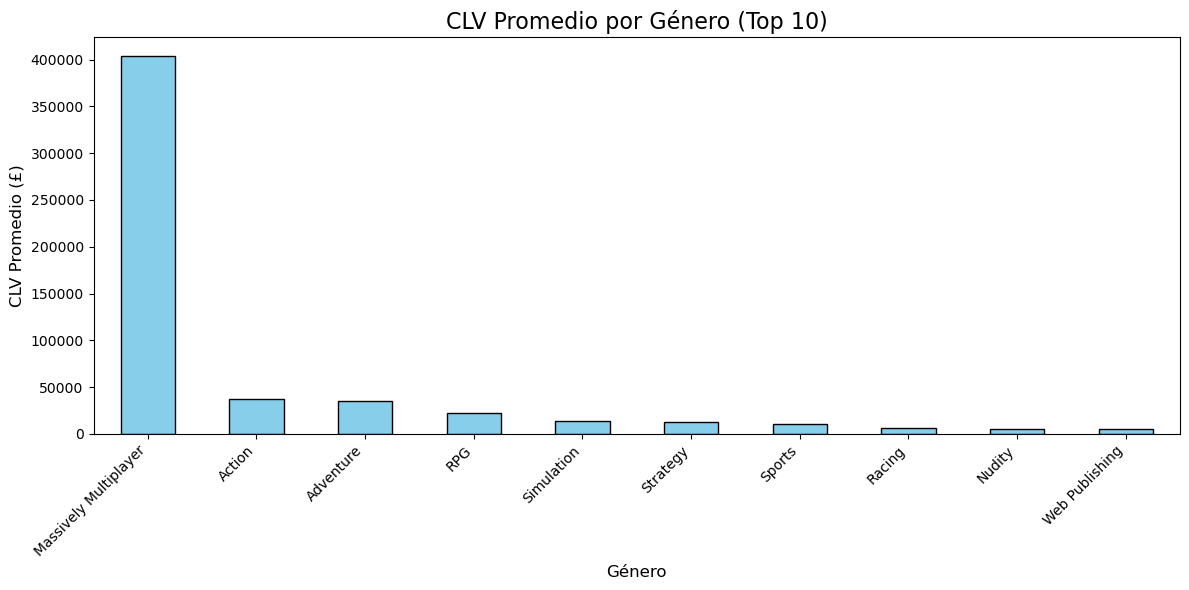

In [22]:
# Graficar CLV por géneros (Top 10 géneros más rentables)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
clv_by_genre.head(10).sort_values(by='clv_mean', ascending=False)['clv_mean'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('CLV Promedio por Género (Top 10)', fontsize=16)
plt.ylabel('CLV Promedio (£)', fontsize=12)
plt.xlabel('Género', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
# Expandir la columna 'categories' para que cada fila tenga una única categoría
categories_data = steam_data.assign(categories=steam_data['categories'].str.split(';')).explode('categories')

# Calcular el CLV promedio y el número de juegos por categoría
clv_by_category = categories_data.groupby('categories').agg(
    clv_mean=('clv', 'mean'),
    game_count=('clv', 'count')
).sort_values(by='clv_mean', ascending=False)

# Mostrar las categorías con mayor CLV promedio
print("CLV promedio por categoría (Top 10):")
print(clv_by_category.head(10))


CLV promedio por categoría (Top 10):
                               clv_mean  game_count
categories                                         
Valve Anti-Cheat enabled  782116.884840          94
Includes Source SDK       185069.951846          35
Stats                     151916.780656        1878
Steam Workshop            136149.592802         897
Online Multi-Player       124412.140066        2487
VR Support                115701.588629         231
Multi-player              114909.397905        3974
MMO                       100284.076723         421
Co-op                      77212.515709        1721
Includes level editor      67518.503636        1036


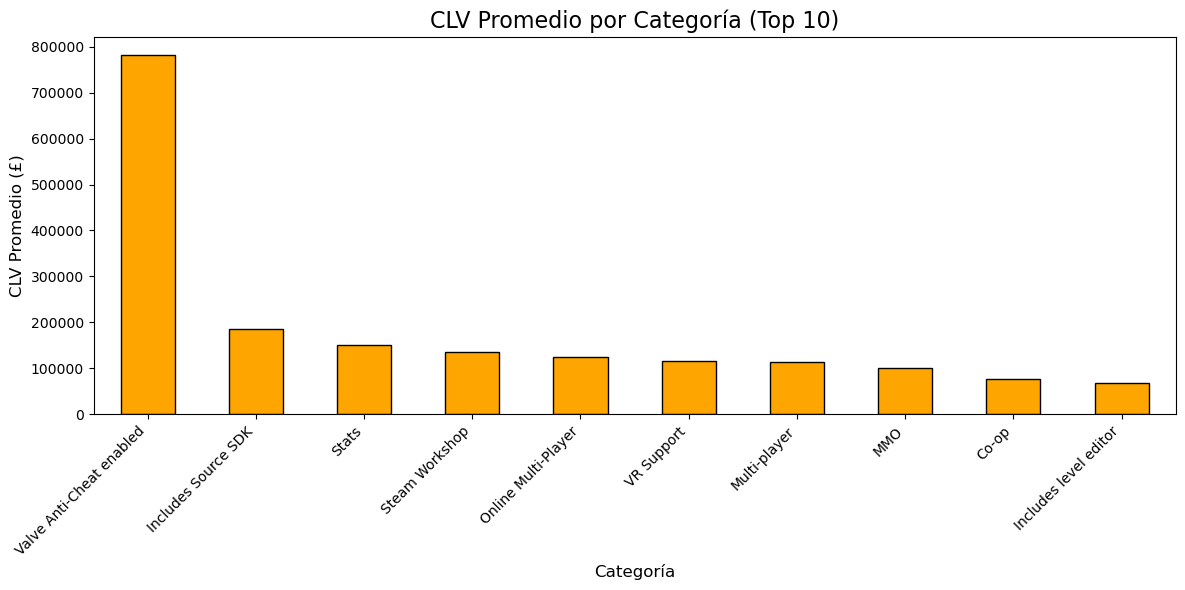

In [24]:
# Graficar CLV por categorías (Top 10 categorías más rentables)
plt.figure(figsize=(12, 6))
clv_by_category.head(10).sort_values(by='clv_mean', ascending=False)['clv_mean'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('CLV Promedio por Categoría (Top 10)', fontsize=16)
plt.ylabel('CLV Promedio (£)', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()